<a href="https://colab.research.google.com/github/oofnaibaf/W1/blob/main/Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

sharks_df = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

sharks_df = sharks_df.drop(['pdf', 'Unnamed: 22', 'Unnamed: 21', 'Case Number.1', 'Case Number', 'href', 'href formula', 'Unnamed: 11'], axis=1)
sharks_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,Back and thigh extensive tissue loss,?,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,Bite to left leg,?,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,Leg severed,1600hr,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,Head right arm and leg severed,?,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",6.0
6969,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",5.0
6970,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",4.0
6971,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,NaN,NaN,"The Sun, 10/20/1938",3.0


In [10]:
'''
print(df.head(), end="\n\n")
print(df.info(), end="\n\n")
print(df.describe(include="all"), end="\n\n")
print(df.nunique(), end="\n\n")

print(df["Unnamed: 21"])
'''



NameError: name 'df' is not defined

In [42]:
#Explode the Country lists into separate rows
sharks_df['Country'] = sharks_df['Country'].str.split(' / ')
sharks_df = sharks_df.explode('Country')
sharks_df["Country"].unique()

#replace bad entries with a single country but too repetitive doesn't show true data cleaning
sharks_df['Country'] = sharks_df['Country'].replace({'CEYLON (SRI LANKA)': 'Sri Lanka'})
sharks_df['Country'] = sharks_df['Country'].replace({'ST HELENA, British overseas territory': 'Saint Helena'})

#lowercased the countries
sharks_df["Country"] = sharks_df["Country"].str.lower()
sharks_df = sharks_df.dropna(subset=['Country'])

#Call method strip to strip off question marks at the end
sharks_df['Country'] = sharks_df['Country'].str.strip('?')

# For case-insensitive match
sharks_df = sharks_df[~sharks_df['Country'].str.contains('asia|africa|ocean|sea|gulf', case=False, regex=True, na=False)]

#Main test code
#sharks_df["Country"].unique()
#sharks_df["Country"].describe()
sharks_df["Country"].value_counts()


,count
Country,
usa,2551
australia,1485
new zealand,145
bahamas,137
papua new guinea,136
...,...
aruba,1
bay of bengal,1
slovenia,1


In [43]:
#Creating a Shark attack states dataframe to focus on USA

#Called method groupby to create dataframe and changed letters to lowercase
sharks_usa = sharks_df.groupby("Country").get_group("usa")
sharks_usa["State"] = sharks_usa["State"].str.lower()

#Cleaning outlier data with spelling errors or erroneous data
sharks_usa['State'] = sharks_usa['State'].replace({'noirth carolina': 'north carolina'})
sharks_usa = sharks_usa[sharks_usa["State"] != 'cuba']

sharks_usa["State"].value_counts()
#display(sharks_usa)


<ipython-input-43-77c4e11b982c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa["State"] = sharks_usa["State"].str.lower()
<ipython-input-43-77c4e11b982c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa['State'] = sharks_usa['State'].replace({'noirth carolina': 'north carolina'})


,count
State,
florida,1183
hawaii,341
california,324
south carolina,172
north carolina,119
texas,81
new jersey,56
new york,45
oregon,31


In [44]:
#sharks_df = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')
# Drop unnecessary columns
#sharks_df = sharks_df.drop(['pdf', 'Unnamed: 22', 'Unnamed: 21', 'Case Number.1', 'Case Number', 'href', 'href formula', 'Unnamed: 11'], axis=1)

# Filter the DataFrame for shark attacks in Florida
florida_attacks = sharks_usa[sharks_usa['State'] == 'florida']


In [57]:
#Cleaning the variable that only has Florida as a state

#filtering
florida_attacks = florida_attacks.dropna(subset=['Location', 'Year'])

## Clean extra spaces and standardize names
florida_attacks['Location'] = florida_attacks['Location'].str.replace(r'\s+', ' ', regex=True).str.strip()

#clean outlier errors
florida_attacks['Location'] = florida_attacks['Location'].replace({'Ponce Inlet, New Smyrna Beach, Volusia County': 'New Smyrna Beach, Volusia County'})

# Group by 'Location' to combine duplicates and sum counts
#florida_attacks= florida_attacks('Location').sum().reset_index()

display(florida_attacks)




,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
1,2024-10-11 00:00:00,2024.0,Unprovoked,usa,florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
8,2024-07-08 00:00:00,2024.0,Unprovoked,usa,florida,Ponce de Leon Inlet Volusia County,Diving into Water,Dempsey Manhart,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark,Miami Herald,NaN
9,2024-07-05 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach,Wading,Not stated,M,26,Minor injury to left foot,16hr15,Not specified,Sacbee Fox 35,NaN
14,2024-07-04 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach Beach Access 14 Volusia County,Swimming,Not released,M,NaN,Bite to left leg,1100hr,6ft shark,Brietbart .com,NaN
15,2024-06-07 00:00:00,2024.0,Unprovoked,usa,florida,Rosemary Beach Walton County,Swimming,Elisabeth Foley,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,12onyourside.com: News Channel 7wjhg : Al.Com:,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,No date,0.0,Unprovoked,usa,florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN,Internet,86.0
6897,"No date, Before 1975",0.0,Provoked,usa,florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",77.0
6904,"No date, Before 1902",0.0,Unprovoked,usa,florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",70.0
6920,Before 1958,0.0,Unprovoked,usa,florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",54.0


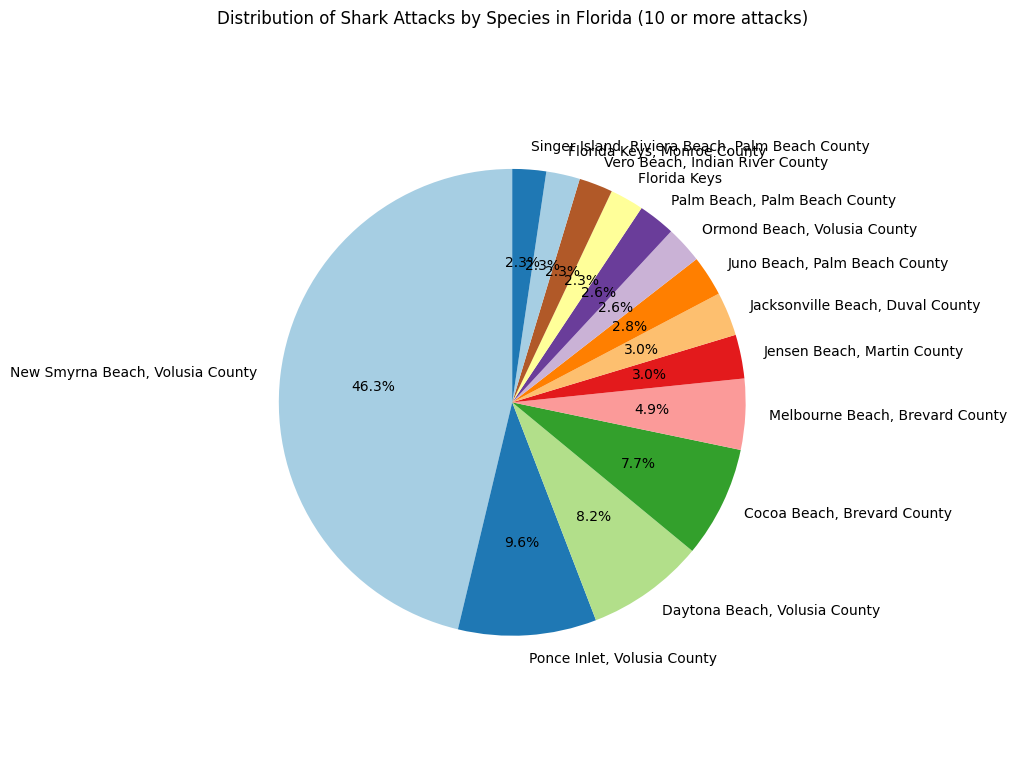

In [58]:
# Count the number of attacks by species
species_counts = florida_attacks['Location'].value_counts()

# Filter out species with fewer than 10 attacks
filtered_species_counts = species_counts[species_counts >= 10]

# Check if there are any species with 10 or more attacks
if filtered_species_counts.empty:
    print("No species with 10 or more attacks found in Florida.")
else:
    # Plot: Pie chart of shark attacks by species in Florida with 10 or more attacks
    plt.figure(figsize=(10, 8))
    plt.pie(filtered_species_counts, labels=filtered_species_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Shark Attacks by Species in Florida (10 or more attacks)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.tight_layout()
    plt.show()

In [24]:
#TEST CASE
#print(filtered_species_counts)
display(florida_attacks)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
1,2024-10-11 00:00:00,2024.0,Unprovoked,usa,florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
8,2024-07-08 00:00:00,2024.0,Unprovoked,usa,florida,Ponce de Leon Inlet Volusia County,Diving into Water,Dempsey Manhart,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark,Miami Herald,NaN
9,2024-07-05 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach,Wading,Not stated,M,26,Minor injury to left foot,16hr15,Not specified,Sacbee Fox 35,NaN
14,2024-07-04 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach Beach Access 14 Volusia County,Swimming,Not released,M,NaN,Bite to left leg,1100hr,6ft shark,Brietbart .com,NaN
15,2024-06-07 00:00:00,2024.0,Unprovoked,usa,florida,Rosemary Beach Walton County,Swimming,Elisabeth Foley,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,12onyourside.com: News Channel 7wjhg : Al.Com:,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,No date,0.0,Unprovoked,usa,florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN,Internet,86.0
6897,"No date, Before 1975",0.0,Provoked,usa,florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",77.0
6904,"No date, Before 1902",0.0,Unprovoked,usa,florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",70.0
6920,Before 1958,0.0,Unprovoked,usa,florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",54.0
